In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from data_handler import load_data

ToDo:

* search for other data that can be represented in this form and linked to the cases
    - number of tests by country could be interesting
    - or impact on the economy
    - or inpact on ...


# Load Data

Data downloaded from  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [2]:
df = pd.read_csv('./data/U99TR3NJ.csv')

In [3]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,12/06/2020,12,6,2020,747,21,Afghanistan,AF,AFG,37172386.0,Asia
1,11/06/2020,11,6,2020,684,21,Afghanistan,AF,AFG,37172386.0,Asia
2,10/06/2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
3,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
4,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
5,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
6,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
7,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
8,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
9,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia


# Explore Data

In [4]:
df.describe()

,day,month,year,cases,deaths,popData2018
count,23010.000000,23010.000000,23010.000000,23010.000000,23010.000000,2.265900e+04
mean,15.468796,3.916123,2019.997088,325.122251,18.304650,4.834325e+07
std,8.972033,1.487487,0.053883,1876.622104,122.422072,1.688667e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,1.000000e+03
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,2.082958e+06
50%,15.000000,4.000000,2020.000000,3.000000,0.000000,9.485386e+06
75%,23.000000,5.000000,2020.000000,55.000000,1.000000,3.198926e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


In [5]:
df.isna().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       90
countryterritoryCode       332
popData2018                351
continentExp                 0
dtype: int64

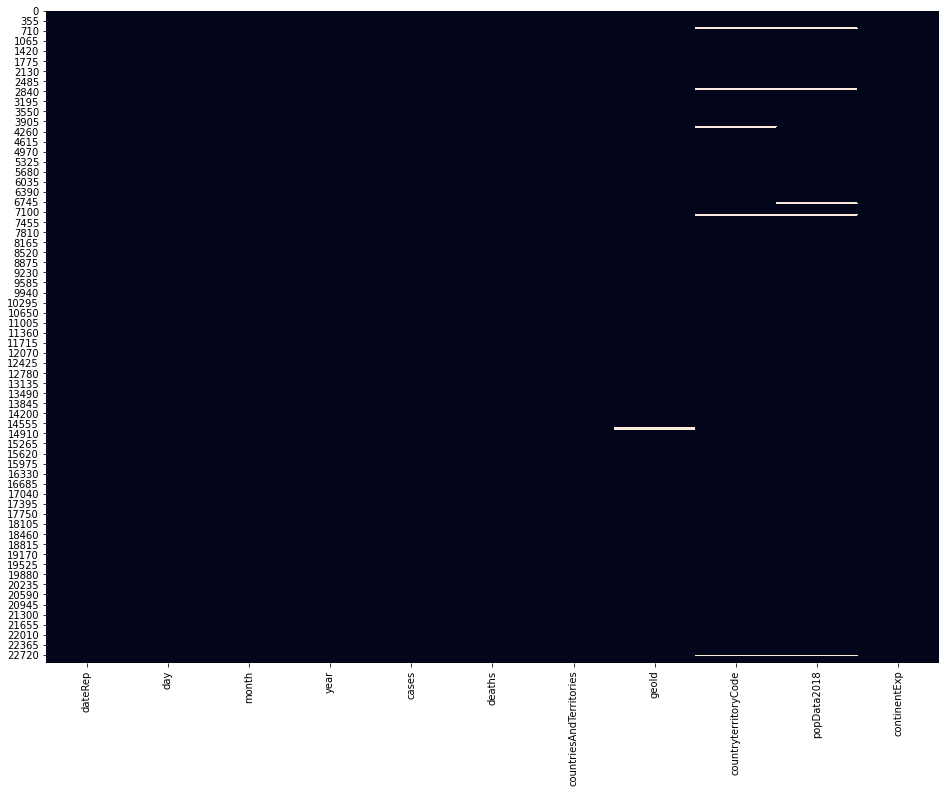

In [6]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.isna(), cbar=False)

We have some missing values, not for all countries a goe ID exists and also the country code is missing for some terittories as well as the population data

# Preprocess Data

In [7]:
# create one date object by row and remove date related columns
df['date'] = df.apply(lambda row: date(year = row['year'], month = row['month'], day = row['day']), axis = 1)
df = df.drop(columns=['dateRep', 'day', 'month', 'year'])

In [8]:
df.head()

,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,date
0,747,21,Afghanistan,AF,AFG,37172386.0,Asia,2020-06-12
1,684,21,Afghanistan,AF,AFG,37172386.0,Asia,2020-06-11
2,542,15,Afghanistan,AF,AFG,37172386.0,Asia,2020-06-10
3,575,12,Afghanistan,AF,AFG,37172386.0,Asia,2020-06-09
4,791,30,Afghanistan,AF,AFG,37172386.0,Asia,2020-06-08


In [9]:
# reshape data to a dictionary by date with dataframes as values for all
# observations by a specific date
dates = sorted(df.date.unique())
data = {}
for date in dates:
    data[date] = df[df.date == date].copy().reset_index()
data

{datetime.date(2019, 12, 31):     index  cases  deaths   countriesAndTerritories geoId countryterritoryCode  \
 0     154      0       0               Afghanistan    AF                  AFG   
 1     410      0       0                   Algeria    DZ                  DZA   
 2    1001      0       0                   Armenia    AM                  ARM   
 3    1248      0       0                 Australia    AU                  AUS   
 4    1413      0       0                   Austria    AT                  AUT   
 ..    ...    ...     ...                       ...   ...                  ...   
 62  20933      0       0                  Thailand    TH                  THA   
 63  21799      0       0      United_Arab_Emirates    AE                  ARE   
 64  21964      0       0            United_Kingdom    UK                  GBR   
 65  22217      0       0  United_States_of_America    US                  USA   
 66  22727      0       0                   Vietnam    VN            

# Look at only europe data

In [10]:
covid_data, geo_data, dates = load_data()

In [11]:
covid_data.describe()

,cases,deaths,popData2018
count,4923.000000,4923.000000,4.923000e+03
mean,468.204956,37.814341,1.731229e+07
std,1311.538933,132.874954,2.881670e+07
min,-766.000000,-1918.000000,1.000000e+03
25%,6.000000,0.000000,1.996957e+06
50%,38.000000,1.000000,5.518050e+06
75%,264.000000,10.000000,1.072767e+07
max,11656.000000,2004.000000,1.444780e+08


In [12]:
covid_data.isna().sum()

cases                      0
deaths                     0
countriesAndTerritories    0
ISO3                       0
popData2018                0
date                       0
dtype: int64

--> use only europe data, easier because we have no missing values